<a href="https://colab.research.google.com/github/Abelbimaw/simpel-image-classification/blob/main/Pract5_Tugas_Klasifikasi_Flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mentautkan dengan drive

In [1]:
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
dirname = '/content/drive/MyDrive/Sem 7/MSIB/Computer Vision/Pract/dataset/dataset4/Flowers'

In [5]:
file_name = []
tag = []
full_path = []
for path, subdirs, files in os.walk(dirname):
    for name in files:
        full_path.append(os.path.join(path, name)) 
        tag.append(path.split('/')[-1])        
        file_name.append(name)

## Merapikan Dataset

In [6]:
import pandas as pd
# memasukan variabel yang sudah dikumpulkan pada looping di atas menjadi sebuah dataframe agar rapih
df = pd.DataFrame({"path":full_path,'file_name':file_name,"tag":tag})
df.groupby(['tag']).size()

tag
Daisy        15
Dandelion    15
Sunflower    15
dtype: int64

In [7]:
## Menampilkan Header pada data yang sudha dirapikan
df.head()

,path,file_name,tag
0,/content/drive/MyDrive/Sem 7/MSIB/Computer Vis...,test_dandelion_4.jpg,Dandelion
1,/content/drive/MyDrive/Sem 7/MSIB/Computer Vis...,test_dandelion_3.jpg,Dandelion
2,/content/drive/MyDrive/Sem 7/MSIB/Computer Vis...,test_dandelion_1.jpg,Dandelion
3,/content/drive/MyDrive/Sem 7/MSIB/Computer Vis...,test_dandelion_2.jpg,Dandelion
4,/content/drive/MyDrive/Sem 7/MSIB/Computer Vis...,test_dandelion_5.jpg,Dandelion


## Melakukan Train Test Split

In [9]:
from sklearn.model_selection import GridSearchCV, train_test_split #library untuk train test split

#variabel yang digunakan pada pemisahan data ini
X= df['path']
y= df['tag']

In [53]:
# split dataset awal menjadi data train dan test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=77)

In [54]:
# kemudian data test dibagi menjadi 2 sehingga menjadi data test dan data validation.
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size=0.5, random_state=100)

In [55]:
# menyatukan kedalam masing-masing dataframe

df_tr = pd.DataFrame({'path':X_train
              ,'tag':y_train
             ,'set':'train'})

df_te = pd.DataFrame({'path':X_test
              ,'tag':y_test
             ,'set':'test'})
df_val = pd.DataFrame({'path':X_val
              ,'tag':y_val
             ,'set':'validation'})

In [56]:
print('train size', len(df_tr))
print('test size', len(df_te))
print('val size', len(df_te))

train size 31
test size 7
val size 7


In [57]:
# melihat proporsi pada masing masing set apakah sudah ok atau masih ada yang ingin diubah
df_all = df_tr.append([df_te,df_val]).reset_index(drop=1)\

print('===================================================== \n')
print(df_all.groupby(['set','tag']).size(),'\n')

print('===================================================== \n')

#cek sample datanya
df_all.sample(3)


set         tag      
test        Daisy         2
            Dandelion     2
            Sunflower     3
train       Daisy        10
            Dandelion    11
            Sunflower    10
validation  Daisy         3
            Dandelion     2
            Sunflower     2
dtype: int64 




,path,tag,set
29,/content/drive/MyDrive/Sem 7/MSIB/Computer Vis...,Daisy,train
30,/content/drive/MyDrive/Sem 7/MSIB/Computer Vis...,Dandelion,train
13,/content/drive/MyDrive/Sem 7/MSIB/Computer Vis...,Sunflower,train


## Membagikan data ke folder baru

In [58]:
import shutil
from tqdm.notebook import tqdm as tq

In [59]:
datasource_path = "/content/drive/MyDrive/Sem 7/MSIB/Computer Vision/Pract/dataset/dataset4/Flowers"
dataset_path = "/content/drive/MyDrive/Sem 7/MSIB/Computer Vision/Pract/dataset/dataset4/Data"

In [60]:
for index, row in tq(df_all.iterrows()):
    
    #detect filepath
    file_path = row['path']
    if os.path.exists(file_path) == False:
            file_path = os.path.join(datasource_path,row['tag'],row['image'].split('.')[0])            
    
    #make folder destination dirs
    if os.path.exists(os.path.join(dataset_path,row['set'],row['tag'])) == False:
        os.makedirs(os.path.join(dataset_path,row['set'],row['tag']))
    
    #define file dest
    destination_file_name = file_path.split('/')[-1]
    file_dest = os.path.join(dataset_path,row['set'],row['tag'],destination_file_name)
    
    #copy file from source to dest
    if os.path.exists(file_dest) == False:
        shutil.copy2(file_path,file_dest)

0it [00:00, ?it/s]

In [61]:
import tensorflow as tf
# Define Input Parameters
dim = (150, 150)
# dim = (456, 456)
channel = (3, )
input_shape = dim + channel

#batch size
batch_size = 16

#Epoch
epoch = 10

## Membuat Data Generator

In [62]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [63]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1. / 255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

In [64]:
# binary = [1,0,0,0,0] [0,1,0,0,0] [0,0,1,0,0] [0,0,0,1,0] [0,0,0,0,1]
# categorical = 1,2,3,4,5

train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/Sem 7/MSIB/Computer Vision/Pract/dataset/dataset4/Data/train',
                                                    target_size=dim,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

test_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/Sem 7/MSIB/Computer Vision/Pract/dataset/dataset4/Data/test',
                                                  target_size=dim,
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=True)

val_generator = val_datagen.flow_from_directory('/content/drive/MyDrive/Sem 7/MSIB/Computer Vision/Pract/dataset/dataset4/Data/validation',
                                                target_size=dim,
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True)

num_class = test_generator.num_classes
labels = train_generator.class_indices.keys()

Found 31 images belonging to 3 classes.
Found 14 images belonging to 3 classes.
Found 7 images belonging to 3 classes.


In [65]:
print(labels)

dict_keys(['Daisy', 'Dandelion', 'Sunflower'])


In [66]:
def tf_data_generator(generator, input_shape):
    num_class = generator.num_classes
    tf_generator = tf.data.Dataset.from_generator(
        lambda: generator,
        output_types=(tf.float32, tf.float32),
        output_shapes=([None
                        , input_shape[0]
                        , input_shape[1]
                        , input_shape[2]]
                       ,[None, num_class])
    )
    return tf_generator

In [67]:
train_data = tf_data_generator(train_generator, input_shape)
test_data = tf_data_generator(test_generator, input_shape)
val_data = tf_data_generator(val_generator, input_shape)

## Membuat Arsitektur Vanilla CNN

In [68]:
from tensorflow.keras import layers, Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Flatten, Dense

In [69]:
# Build neural network with Sequential Mode
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')                                    
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 512)      

In [70]:
# Compilation model with 'rmsprop' and use loss function categorical_crossentropy
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [71]:
from time import time
#import time
# Callback for see how much time to train every epoch
class TImingCallback(tf.keras.callbacks.Callback):
  def __init__(self):
    self.logs=[]
  def on_epoch_begin(self, epoch, logs={}):
    self.starttime=time()
  def on_epoch_end(self, epoch, logs={}):
    self.logs.append(time()-self.starttime)

cb = TImingCallback()

## Proses Training Model

In [72]:
# Train Model
import datetime

start = datetime.datetime.now()
history = model.fit(
      x=train_data,
      steps_per_epoch=len(train_generator),
      epochs= 5,
      validation_data=val_data,
      validation_steps=len(val_generator), 
      shuffle=True,
      verbose = 1,
      callbacks =[cb]
)

# Check total time for train model
end = datetime.datetime.now()
total_time = end - start
print("\nTotal time for train model :", str(total_time))

Epoch 1/5
2/2 [==============================] - 3s 1s/step - loss: 1.5106 - accuracy: 0.3548 - val_loss: 1.1055 - val_accuracy: 0.2857
Epoch 2/5
2/2 [==============================] - 2s 1s/step - loss: 1.1222 - accuracy: 0.3226 - val_loss: 1.0682 - val_accuracy: 0.4286
Epoch 3/5
2/2 [==============================] - 2s 1s/step - loss: 1.0507 - accuracy: 0.4839 - val_loss: 0.9781 - val_accuracy: 0.5714
Epoch 4/5
2/2 [==============================] - 2s 1s/step - loss: 0.9755 - accuracy: 0.5161 - val_loss: 0.8564 - val_accuracy: 0.4286
Epoch 5/5
2/2 [==============================] - 2s 1s/step - loss: 0.8271 - accuracy: 0.5806 - val_loss: 0.6357 - val_accuracy: 0.7143

Total time for train model : 0:00:21.004622


## Memvisualisasikan Hasil dari Training

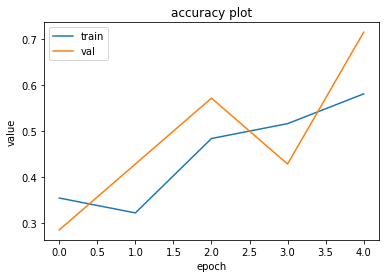

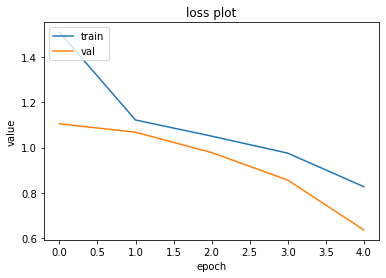

In [73]:
# Showing Graph of result train model
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy plot')
plt.ylabel('value')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss plot')
plt.ylabel('value')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Proses Prediksi menggunakan Inputan

Saving train_daisy_4.jpg to train_daisy_4.jpg
train_daisy_4.jpg
Daisy


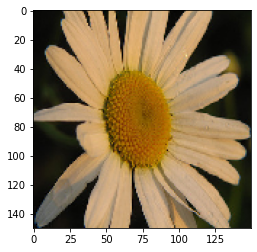

In [78]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

upload = files.upload()

for fn in upload.keys():
 
  # predict images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0,0]==1:
    print('Daisy')
  elif classes[0,1]==1:
    print('Dandelion')
  else:
    print('Sunflower')
